# Breast Cancer Detection #2
This project expands on the previous breast cancer detection model by incorporating additional parameters. We utilize both standard and cropped CT scan images to improve the model's accuracy. The goal is to create a more robust machine-learning model capable of accurately detecting breast cancer from medical imaging data.

### Importing Libraries

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Loading the Data

In [16]:
# Load your training and testing data with a semicolon delimiter
train_data = pd.read_csv('train_data_2p.csv', delimiter=';')
test_data = pd.read_csv('test_data_2p.csv', delimiter=';')

### Exploring the Data

In [17]:
train_data.tail(10)

,ct scan,cropped ct scan,classification
1534,1.3.6.1.4.1.9590.100.1.2.398510539611405601424...,1.3.6.1.4.1.9590.100.1.2.275982981411695551937...,4
1535,1.3.6.1.4.1.9590.100.1.2.327261889611833044623...,1.3.6.1.4.1.9590.100.1.2.689558302137605335110...,4
1536,1.3.6.1.4.1.9590.100.1.2.148920323810559075320...,1.3.6.1.4.1.9590.100.1.2.347949749311400992306...,2
1537,1.3.6.1.4.1.9590.100.1.2.141379766611952338808...,1.3.6.1.4.1.9590.100.1.2.471800501113278079404...,2
1538,1.3.6.1.4.1.9590.100.1.2.163878893312280121829...,1.3.6.1.4.1.9590.100.1.2.336349754511972262635...,5
1539,1.3.6.1.4.1.9590.100.1.2.215164923711360518726...,1.3.6.1.4.1.9590.100.1.2.126466180112225633704...,5
1540,1.3.6.1.4.1.9590.100.1.2.398227953312611741920...,1.3.6.1.4.1.9590.100.1.2.144395473912570122935...,2
1541,1.3.6.1.4.1.9590.100.1.2.832140770136026940308...,1.3.6.1.4.1.9590.100.1.2.177833786212905547113...,2
1542,1.3.6.1.4.1.9590.100.1.2.114030713125639071286...,1.3.6.1.4.1.9590.100.1.2.420697654133217172227...,4
1543,1.3.6.1.4.1.9590.100.1.2.197835155813429240930...,1.3.6.1.4.1.9590.100.1.2.376397880911533038033...,4


In [18]:
test_data.tail(10)

,ct scan,cropped ct scan,classification
316,1.3.6.1.4.1.9590.100.1.2.267631872912076578535...,1.3.6.1.4.1.9590.100.1.2.115163798412033576942...,4
317,1.3.6.1.4.1.9590.100.1.2.171130805912113865022...,1.3.6.1.4.1.9590.100.1.2.969547553134480777268...,4
318,1.3.6.1.4.1.9590.100.1.2.127823446114126149027...,1.3.6.1.4.1.9590.100.1.2.364806155210887696726...,3
319,1.3.6.1.4.1.9590.100.1.2.284356402310994259807...,1.3.6.1.4.1.9590.100.1.2.993548952115960407215...,3
320,1.3.6.1.4.1.9590.100.1.2.165100488610511635540...,1.3.6.1.4.1.9590.100.1.2.189733200912008359037...,4
321,1.3.6.1.4.1.9590.100.1.2.242128209412592948513...,1.3.6.1.4.1.9590.100.1.2.526198631111753026131...,4
322,1.3.6.1.4.1.9590.100.1.2.277098686410919869923...,1.3.6.1.4.1.9590.100.1.2.355286671810515664909...,3
323,1.3.6.1.4.1.9590.100.1.2.258951180113994815379...,1.3.6.1.4.1.9590.100.1.2.366216590611306753640...,3
324,1.3.6.1.4.1.9590.100.1.2.232308535910657861814...,1.3.6.1.4.1.9590.100.1.2.275923704411531002833...,3
325,1.3.6.1.4.1.9590.100.1.2.220517698812723136111...,1.3.6.1.4.1.9590.100.1.2.415945278010571172614...,3


### Setting Up Image Directories

In [19]:
# Define the directory containing the images
image_directory = 'jpeg'  # Adjust this to the path of your "jpeg" directory

# Define the column names in your CSV file that contain the file paths
image_column_names = ["ct scan", "cropped ct scan"]

### Data Preprocessing

In [20]:
# Define a function to preprocess the data
def preprocess_data(data, image_column_names, image_directory, target_size=(224, 224), batch_size=32):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    image_data = []
    labels = []  # Store the labels for each image
    
    for _, row in data.iterrows():
        for column_name in image_column_names:
            file_location = os.path.join(image_directory, row[column_name])
            image = load_img(file_location, target_size=target_size)
            image_array = img_to_array(image)
            image_data.append(image_array)
            labels.append(row['classification'])  # Assign the label to the image
    
    X = np.array(image_data)
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(labels)  # Use the labels collected
    
    data_generator = datagen.flow(X, y, batch_size=batch_size)
    
    return data_generator, label_encoder

In [21]:
# Preprocess the training and testing data
train_data_generator, label_encoder = preprocess_data(train_data, image_column_names, image_directory)
test_data_generator, _ = preprocess_data(test_data, image_column_names, image_directory)

### Building a More Complex Model

In [22]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

### Compiling the Model

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the Model

In [24]:
# Train the model and collect training history
history = model.fit(train_data_generator, epochs=20, validation_data=test_data_generator)

Epoch 1/20
97/97 [==============================] - 34s 342ms/step - loss: 5.3513 - accuracy: 0.2814 - val_loss: 1.5572 - val_accuracy: 0.2745
Epoch 2/20
97/97 [==============================] - 34s 349ms/step - loss: 1.4741 - accuracy: 0.3546 - val_loss: 1.5328 - val_accuracy: 0.3221
Epoch 3/20
97/97 [==============================] - 33s 338ms/step - loss: 1.3673 - accuracy: 0.4113 - val_loss: 1.5183 - val_accuracy: 0.3328
Epoch 4/20
97/97 [==============================] - 33s 338ms/step - loss: 1.2661 - accuracy: 0.4705 - val_loss: 1.6557 - val_accuracy: 0.3282
Epoch 5/20
97/97 [==============================] - 32s 333ms/step - loss: 1.1303 - accuracy: 0.5534 - val_loss: 1.5728 - val_accuracy: 0.3252
Epoch 6/20
97/97 [==============================] - 33s 340ms/step - loss: 0.9819 - accuracy: 0.6315 - val_loss: 1.5952 - val_accuracy: 0.2715
Epoch 7/20
97/97 [==============================] - 33s 342ms/step - loss: 0.8165 - accuracy: 0.7115 - val_loss: 1.6304 - val_accuracy: 0.2730

In [25]:
# Extract training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

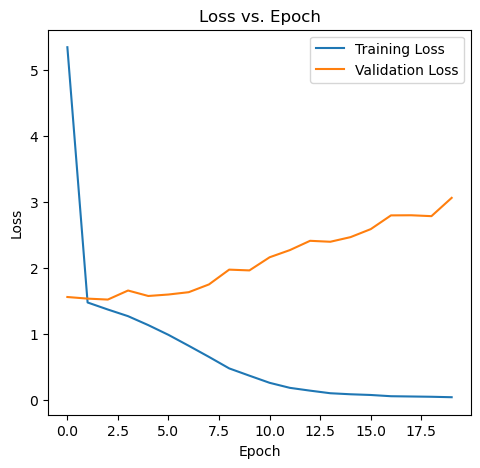

In [26]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

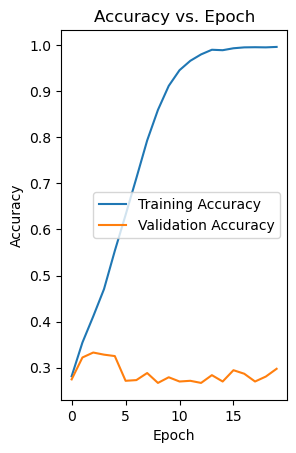

In [27]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Evaluating the Model

In [28]:
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

21/21 [==============================] - 2s 88ms/step - loss: 3.0634 - accuracy: 0.2975
Test Loss: 3.0634
Test Accuracy: 0.2975
